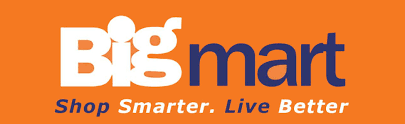

UNDERSTANDING OF THE PROBLEM STATEMENT:
According to the quote, "Success in sales is the sum of small efforts, repeated day in & day out"
Let us consider a supermarket has several outlets or several stores around the world & they want us to predict the sales which they can expect.

APPLICATION OF PREDICTING THE SALES:
We can tell the company what are all the challenges they may face
What are the brands or products which is sold the most & other such kind of things
This helps sales team to understand which product to sell & which product to promote & other such kind of things
They can also make several marketing plans(let's say that a particular product in a particular store is getting sold the most & we may find some insights from it - as of why this product is getting sold the most & this helps the company to make better marketing decisions)

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")


In [377]:
#Let therebe display from multiple commands

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [378]:
from google.colab import drive
drive.mount('/gdrive')                  # Mounting Gdrive for dataset

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [379]:
# Set datafile path

path = "/gdrive/MyDrive/Colab_data_files/Storeprediction"
os.chdir(path)

In [380]:
# Read train and test file
train = pd.read_csv("/gdrive/MyDrive/Colab_data_files/Storeprediction/Train.csv")
test = pd.read_csv("/gdrive/MyDrive/Colab_data_files/Storeprediction/Test.csv")

In [381]:
train.head()  # Shows first five Rows with .head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [382]:
train.shape   # How many Rows and Columns in complete  Dataset
test.shape

(8523, 12)

(5681, 11)

In [383]:
train.columns    # Columns names

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [384]:
train.describe() #Statistical view

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [385]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [386]:
train.apply(lambda x: len(x.unique()))

,0
Item_Identifier,1559
Item_Weight,416
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,4
Outlet_Location_Type,3


# Data Exploration

In this phase useful information about the data has been extracted from the dataset. That is trying to identify the
information from hypotheses vs available data. Which shows that the attributes Outlet size and Item weight face the
problem of missing values, also the minimum value of Item Visibility is zero which is not actually practically possible.
Establishment year of Outlet varies from 1985 to 2009. These values may not be appropriate in this form. So, we need to
convert them into how old a particular outlet is. There are 1559 unique products, as well as 10 unique outlets, present in
the dataset. The attribute Item type contains 16 unique values. Whereas two types of Item Fat Content are there but some
of them are misspelled as regular instead of ’Regular’ and low fat, LF instead of Low Fat. The response variable i.e. Item
Outlet Sales was positively skewed. So, to remove the skewness of response variable a log operation was performed on
Item Outlet Sales.

# Data Preprocessing and Cleaning

# Filling missing Values

In [387]:
train.isnull().sum()  # Checking null values

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [388]:
test.isnull().sum()  # Checking null values

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [389]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)   # Filling missing values with mean for Item weight column for train.csv

In [390]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)  # Filling missing values with mean for Item weight column for test.csv

In [391]:
train.Outlet_Size.value_counts()  # Balancing categories with less category value by filling missing with "High category"

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [392]:
test.Outlet_Size.value_counts()   # Balancing categories with less category value by filling missing with "High category"

,count
Outlet_Size,
Medium,1862
Small,1592
High,621


In [393]:
train['Outlet_Size'].fillna("High", inplace=True)
test['Outlet_Size'].fillna("High", inplace=True)



In [394]:
train.isnull().sum()
test.isnull().sum()   # No missing value in train and test


,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [395]:
train["Item_Fat_Content"].value_counts() #Low fat and regular category is duplicated (Lowfat with LF and lowfat /Regular with reg) Changed columns value from project to Project


,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [396]:
train["Item_Fat_Content"] = train["Item_Fat_Content"].replace(['LF'], 'Low Fat')
train["Item_Fat_Content"] = train["Item_Fat_Content"].replace(['low fat'], 'Low Fat')
train["Item_Fat_Content"] = train["Item_Fat_Content"].replace(['reg'], 'Regular')

In [397]:
train["Item_Fat_Content"].value_counts()  #Replacement of column category is done with filling correct category and data correction is complete now

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [398]:

test["Item_Fat_Content"].value_counts()  # Similar data correction required for test file

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [399]:
test["Item_Fat_Content"] = test["Item_Fat_Content"].replace(['LF'], 'Low Fat')
test["Item_Fat_Content"] = test["Item_Fat_Content"].replace(['low fat'], 'Low Fat')
test["Item_Fat_Content"] = test["Item_Fat_Content"].replace(['reg'], 'Regular')

In [400]:
test["Item_Fat_Content"].value_counts() #Replacement of column category is done with filling correct category and data correction is complete now

,count
Item_Fat_Content,
Low Fat,3668
Regular,2013


In [401]:
train ["Item_Identifier"].value_counts()

,count
Item_Identifier,
FDW13,10
FDG33,10
NCY18,9
FDD38,9
DRE49,9
...,...
FDY43,1
FDQ60,1
FDO33,1


In [402]:
train['Item_Visibility'].value_counts()

,count
Item_Visibility,
0.000000,526
0.076975,3
0.162462,2
0.076841,2
0.073562,2
...,...
0.013957,1
0.110460,1
0.124646,1


In [403]:
print(train['Item_Visibility'].mean())  # Checking mean value to fill Zeros with mean



0.06613202877895108


In [404]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0, 0.066132)

In [405]:
train[["Item_Visibility"]].value_counts() # Replaced Zeros with mean

,count
Item_Visibility,
0.066132,526
0.076975,3
0.112203,2
0.145266,2
0.071958,2
...,...
0.038729,1
0.038729,1
0.038725,1


# Feature Engineering

In [406]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2024 - x)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37


In [407]:
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2024 - x)
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,25
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,High,Tier 2,Supermarket Type1,17
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,High,Tier 3,Grocery Store,26
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,High,Tier 2,Supermarket Type1,17
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,39


# Independent Variables (Categorical) Visualization

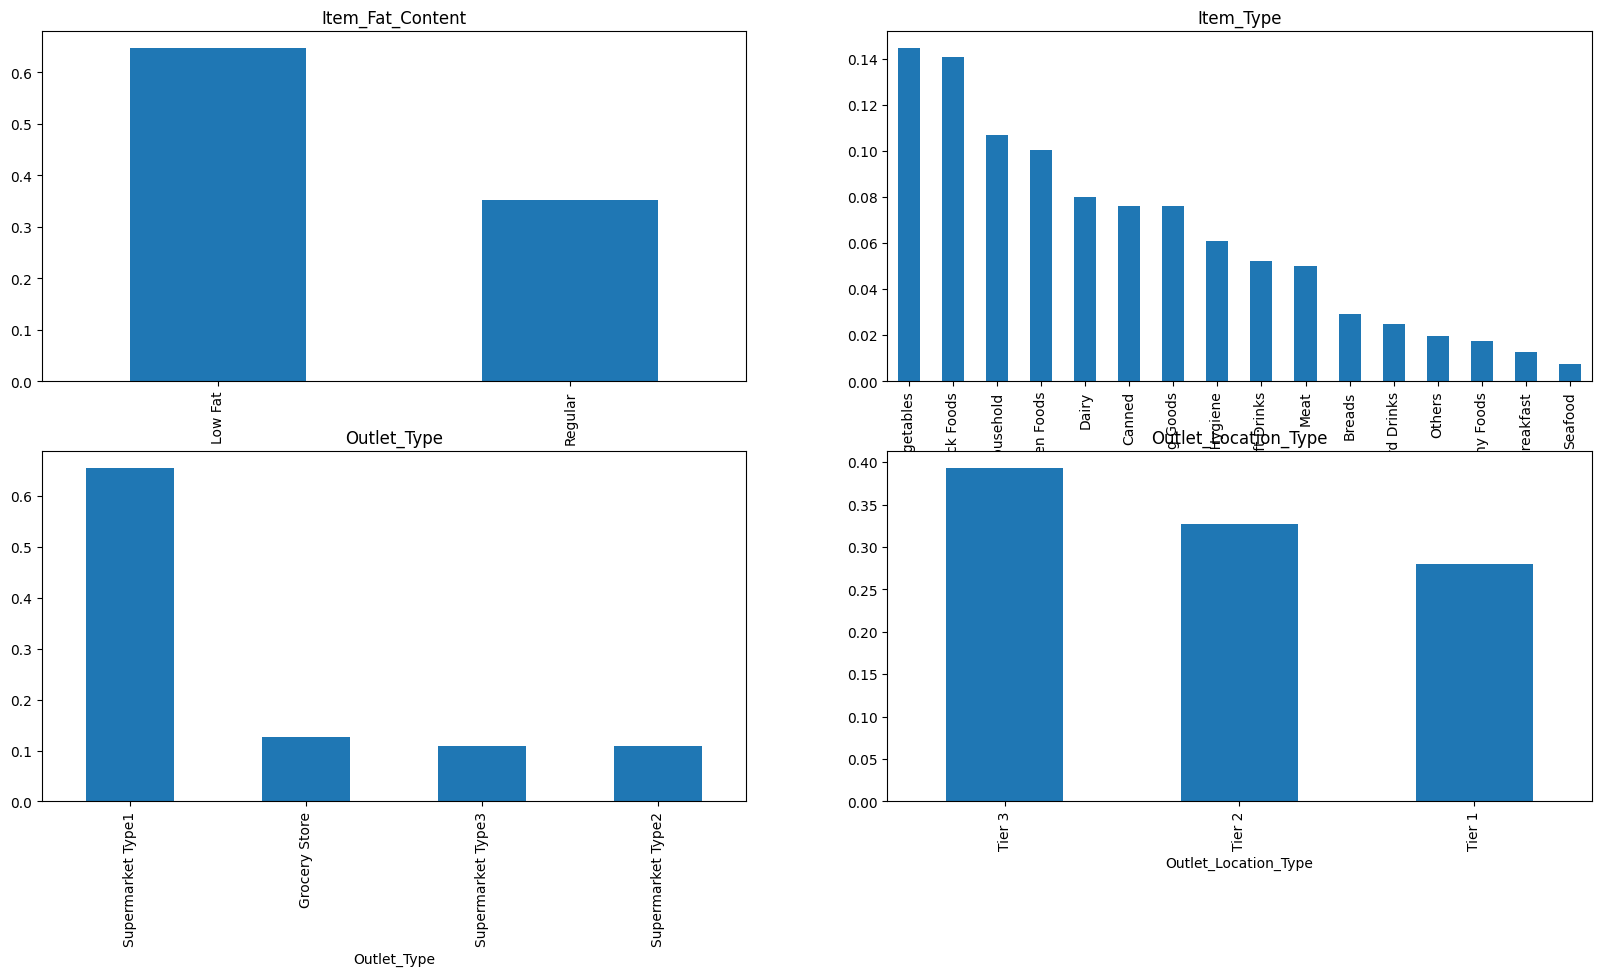

In [408]:
# Visualize independent categorical features
plt.figure(figsize = (20, 10))
plt.subplot(221)
train['Item_Fat_Content'].value_counts(normalize = True).plot.bar(title = 'Item_Fat_Content');
plt.subplot(222)
train['Item_Type'].value_counts(normalize = True).plot.bar(title = 'Item_Type');
plt.subplot(223)
train['Outlet_Type'].value_counts(normalize = True).plot.bar(title = 'Outlet_Type');
plt.subplot(224)
train['Outlet_Location_Type'].value_counts(normalize = True).plot.bar(title = 'Outlet_Location_Type');


Item_Type
From the above graph we can observe the different items or food types we have such as dairy, soft drinks, meat, fruits & vegetables, household etc
Hence totally we have about 16 Item_Type values in this case where we have more values in the fruits & vegetables column and snack foods column



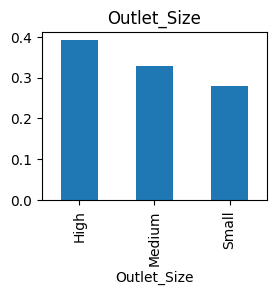

In [409]:
plt.subplot(224)
train['Outlet_Size'].value_counts(normalize = True).plot.bar(title = 'Outlet_Size');

Outlet_Size
From the above graph, we can observe that we have three outlet_Size in this case which is medium, small & high

# Item Fat content VS Target

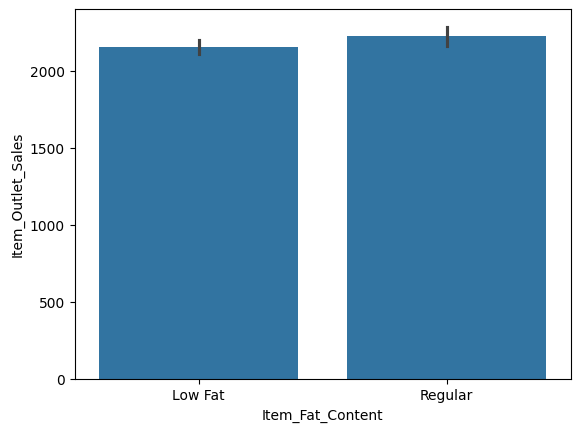

In [410]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train);

#Though people prefer more low fat product there is not much difference in the average sales

# Outlet_Type VS Target

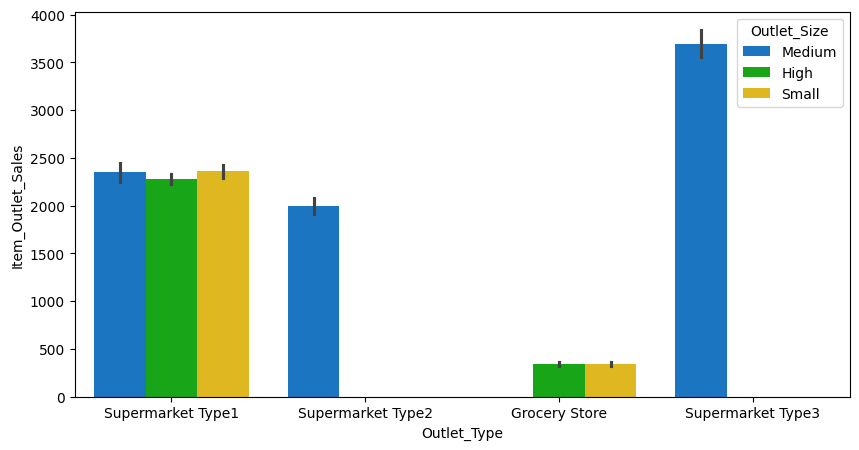

In [411]:
plt.figure(figsize=(10,5));

sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', hue='Outlet_Size', data=train ,palette='nipy_spectral');

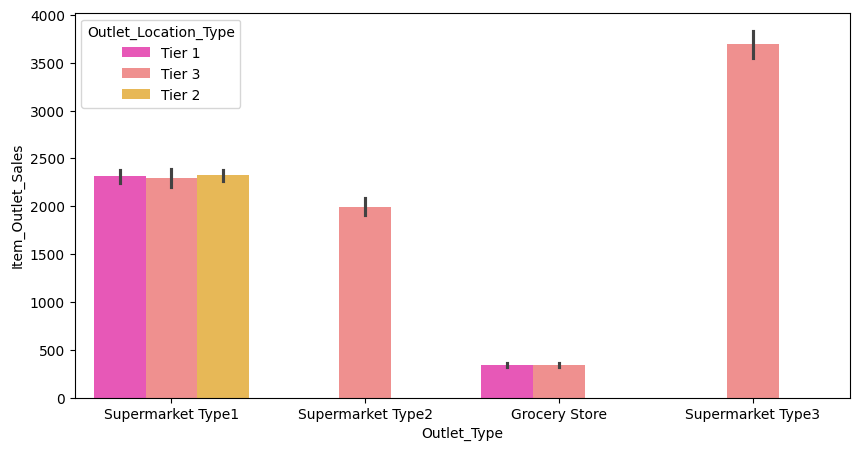

In [412]:
plt.figure(figsize=(10,5));
sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', hue='Outlet_Location_Type', data=train ,palette='spring');

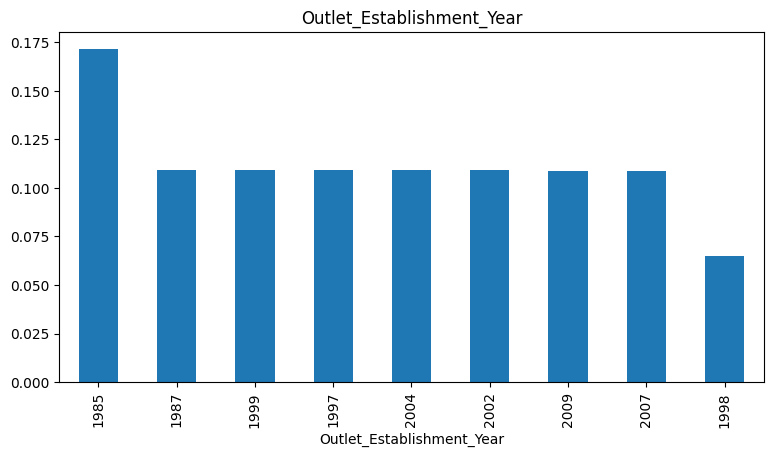

In [413]:
plt.figure(figsize = (20, 10))
plt.subplot(221)
train['Outlet_Establishment_Year'].value_counts(normalize = True).plot.bar(title = 'Outlet_Establishment_Year');

Hence from the above graph we can observe that we have the outlet establishment from the year 1985, 1987 and all the way to 2009

Therefore these are the years on which different outlets or different stores have been established

We can also observe that a lots of stores are established in the year 1985 & less in the year 1998 & all the others years are almost same

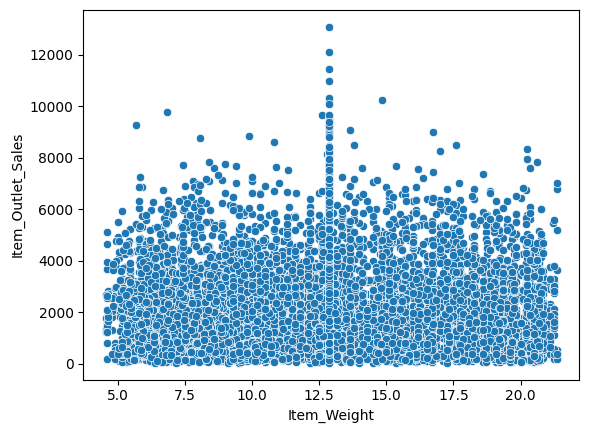

In [414]:
sns.scatterplot(data=train, x="Item_Weight", y="Item_Outlet_Sales");


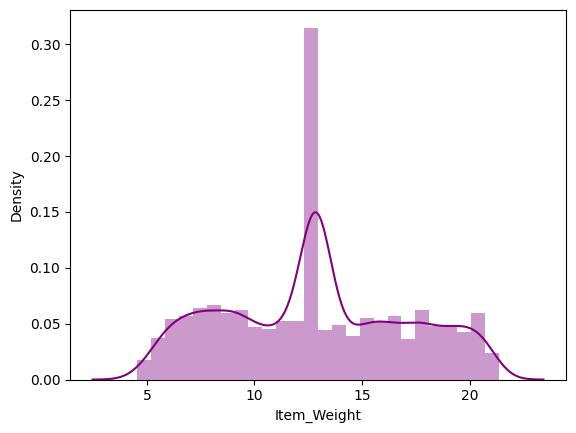

In [415]:
#plt.figure(figsize=(5,5))
sns.distplot(train['Item_Weight'], color='purple');
plt.show();

Hence from the above graph we can observe that we have the item weight from 5 Kg to 20 Kg & we have maximum values around 12 Kg where the mean is 12.85 Kg

Therefore in this 8523 products the average weight is about 12.8 Kg

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

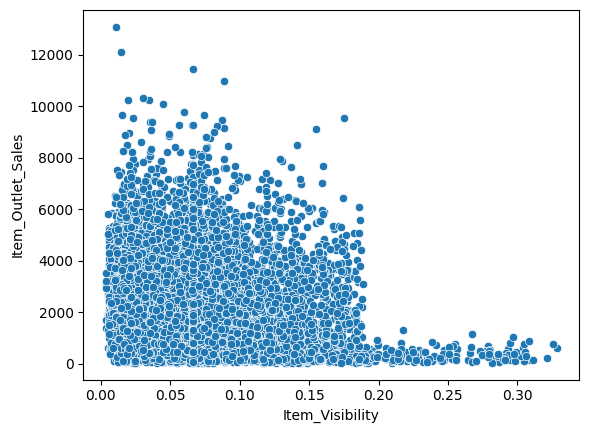

In [416]:
sns.scatterplot(data=train, x="Item_Visibility", y="Item_Outlet_Sales")


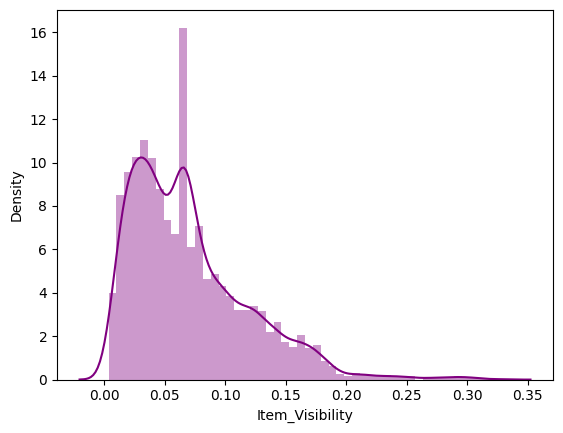

In [417]:
# Item Visibility distribution
#plt.figure(figsize=(5,5))
sns.distplot(train['Item_Visibility'], color='purple');
plt.show();

Hence from the above graph we can observe that Item_Visibility feature is positively skewed


<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

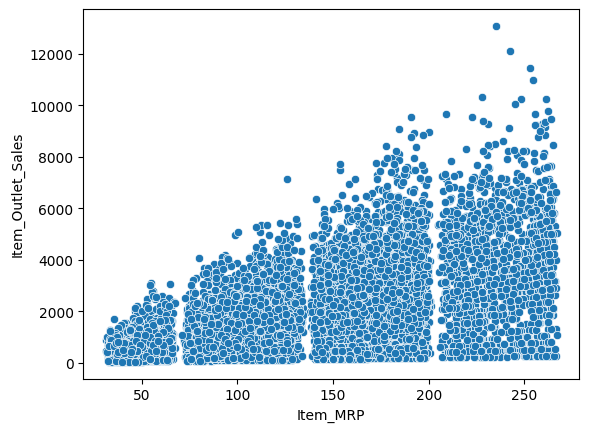

In [418]:
sns.scatterplot(data=train, x="Item_MRP", y="Item_Outlet_Sales")


<Axes: xlabel='Item_MRP', ylabel='Density'>

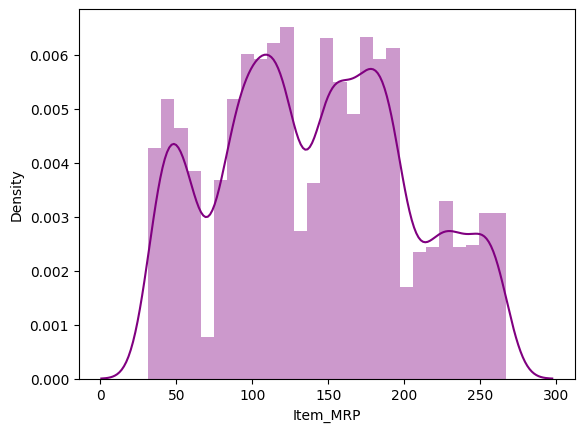

In [419]:
# Item MRP distribution
#plt.figure(figsize=(5,5))
sns.distplot(train['Item_MRP'], color='purple')
plt.show()

From the above graph, we can observe that we have good amount of products for 50 MRP, 100 MRP ,200 MRP & then we have less products

Hence we have more products in the range of 100 MRP - 180 MRP

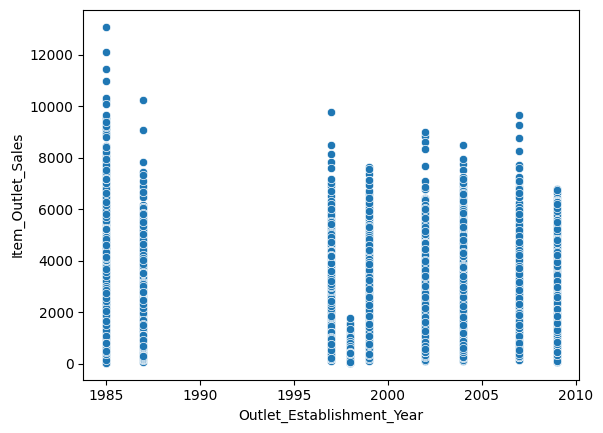

In [420]:
sns.scatterplot(data=train, x="Outlet_Establishment_Year", y="Item_Outlet_Sales");


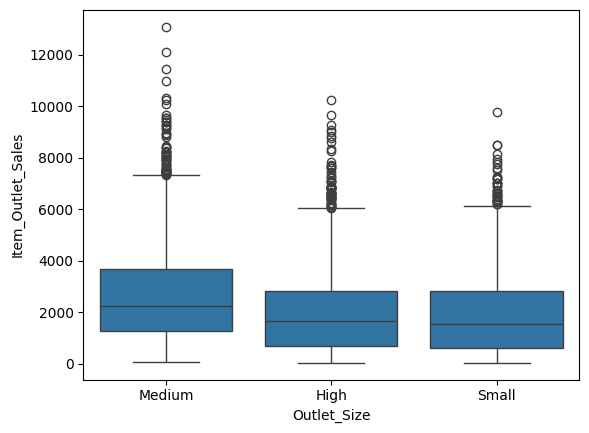

In [421]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train);


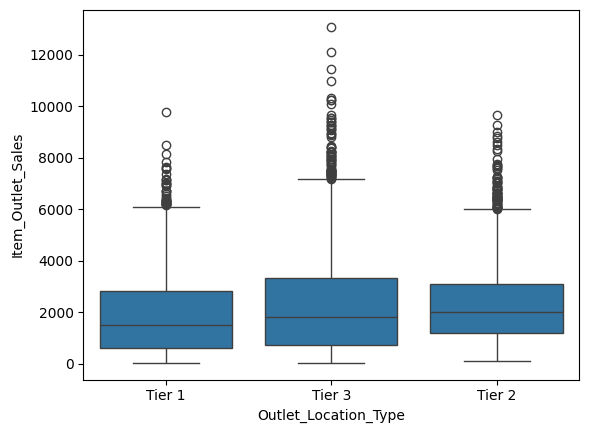

In [422]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train);


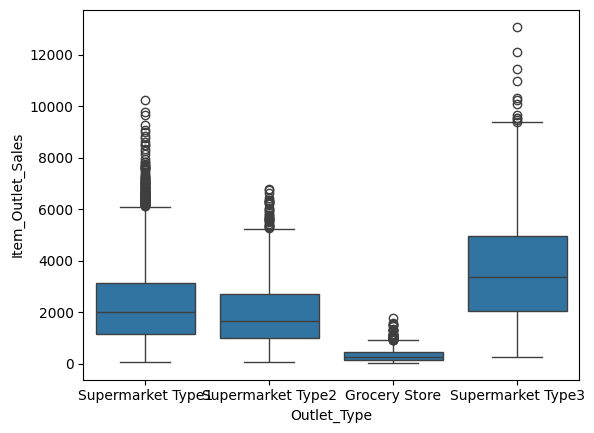

In [423]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train);


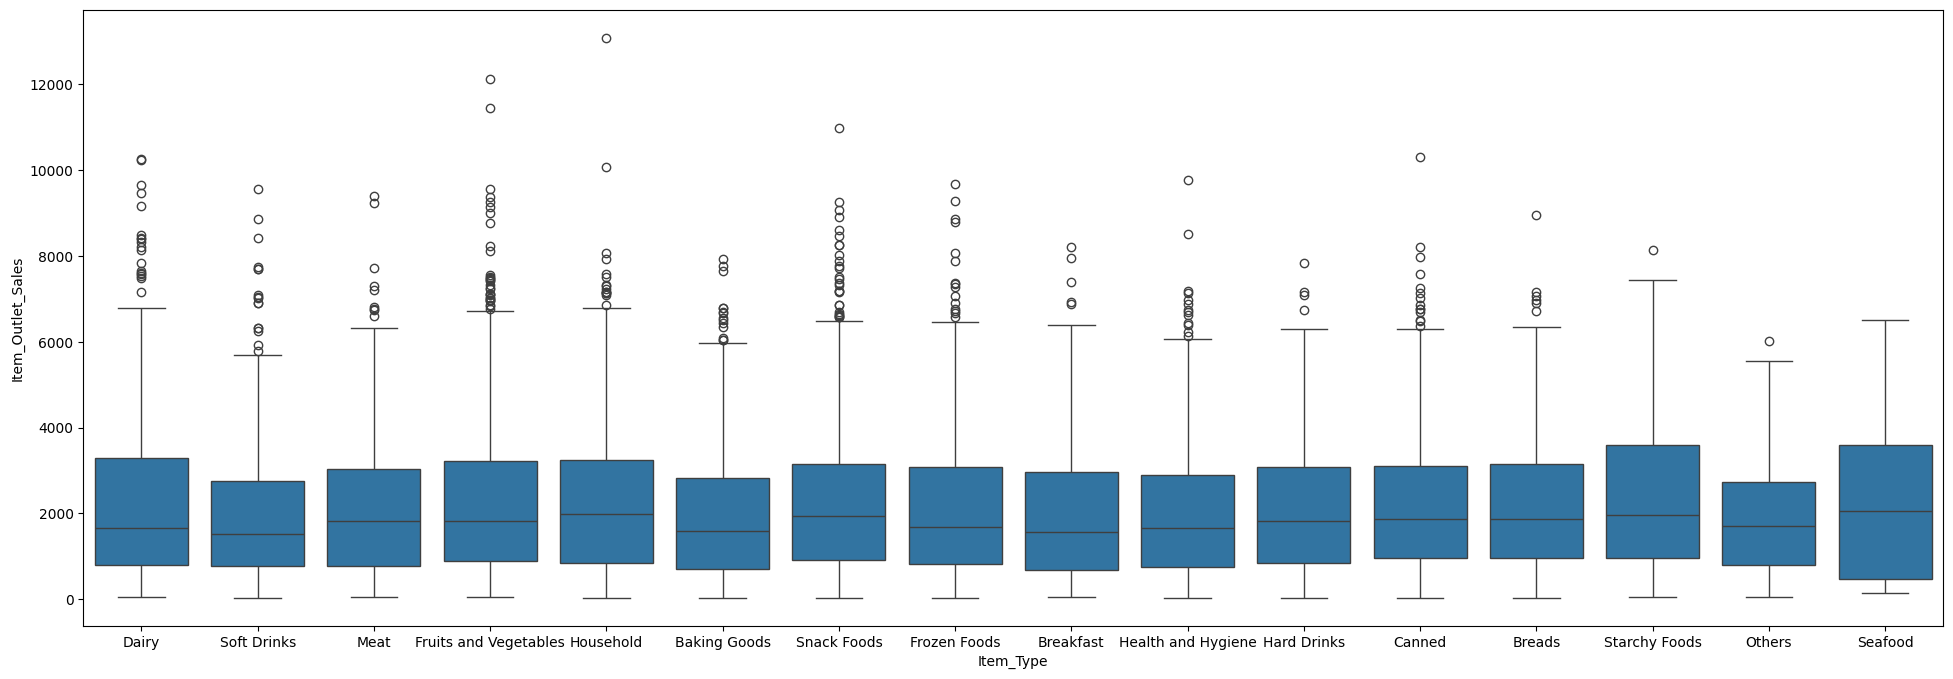

In [424]:
plt.figure(figsize=(24,8));

sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=train);

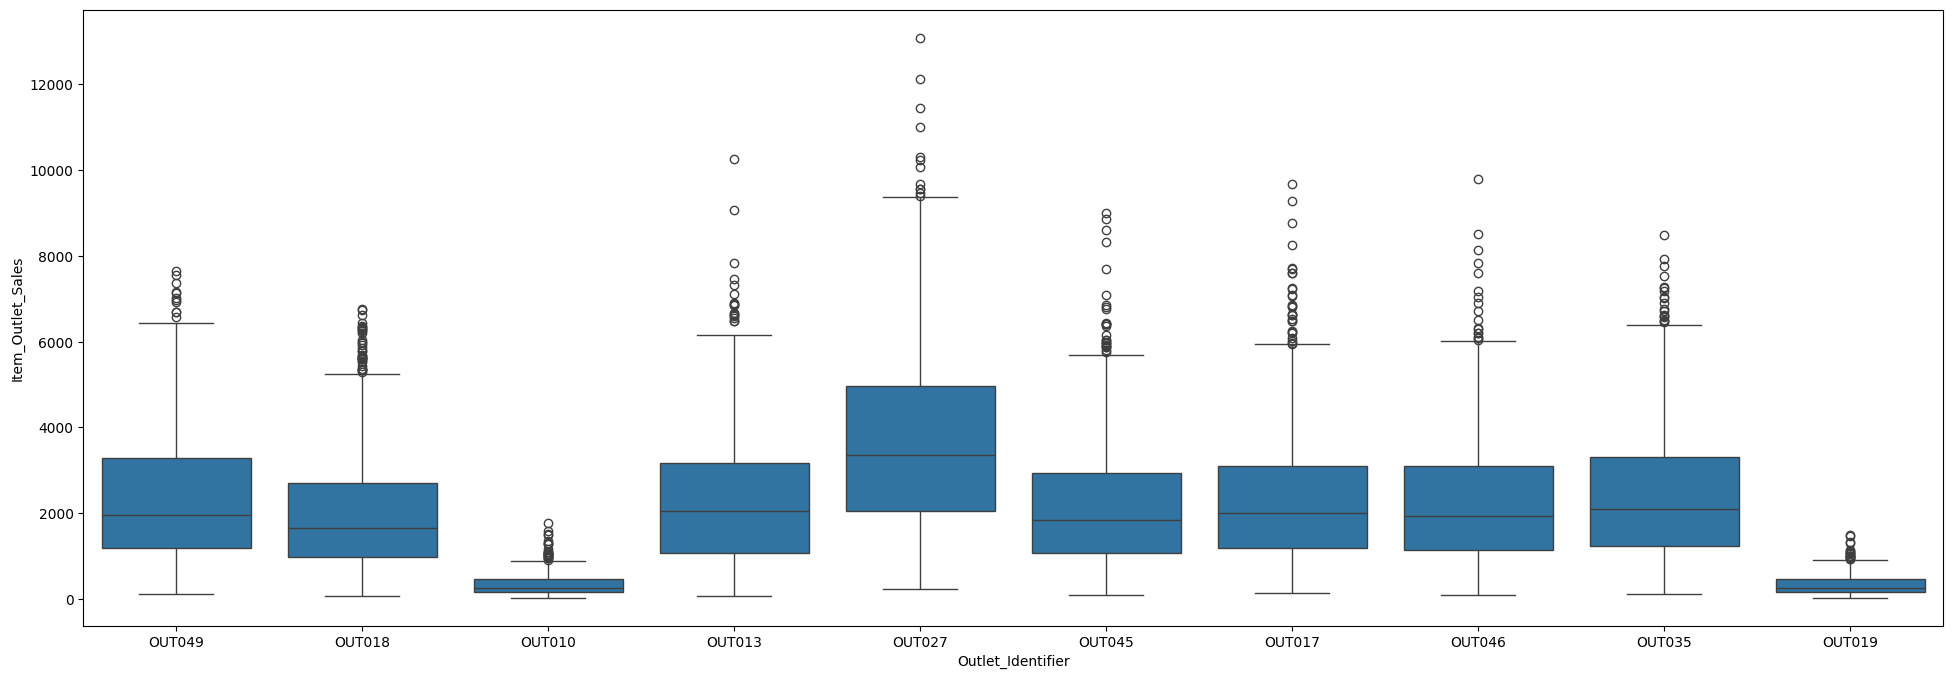

In [425]:
plt.figure(figsize=(24,8));
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=train);

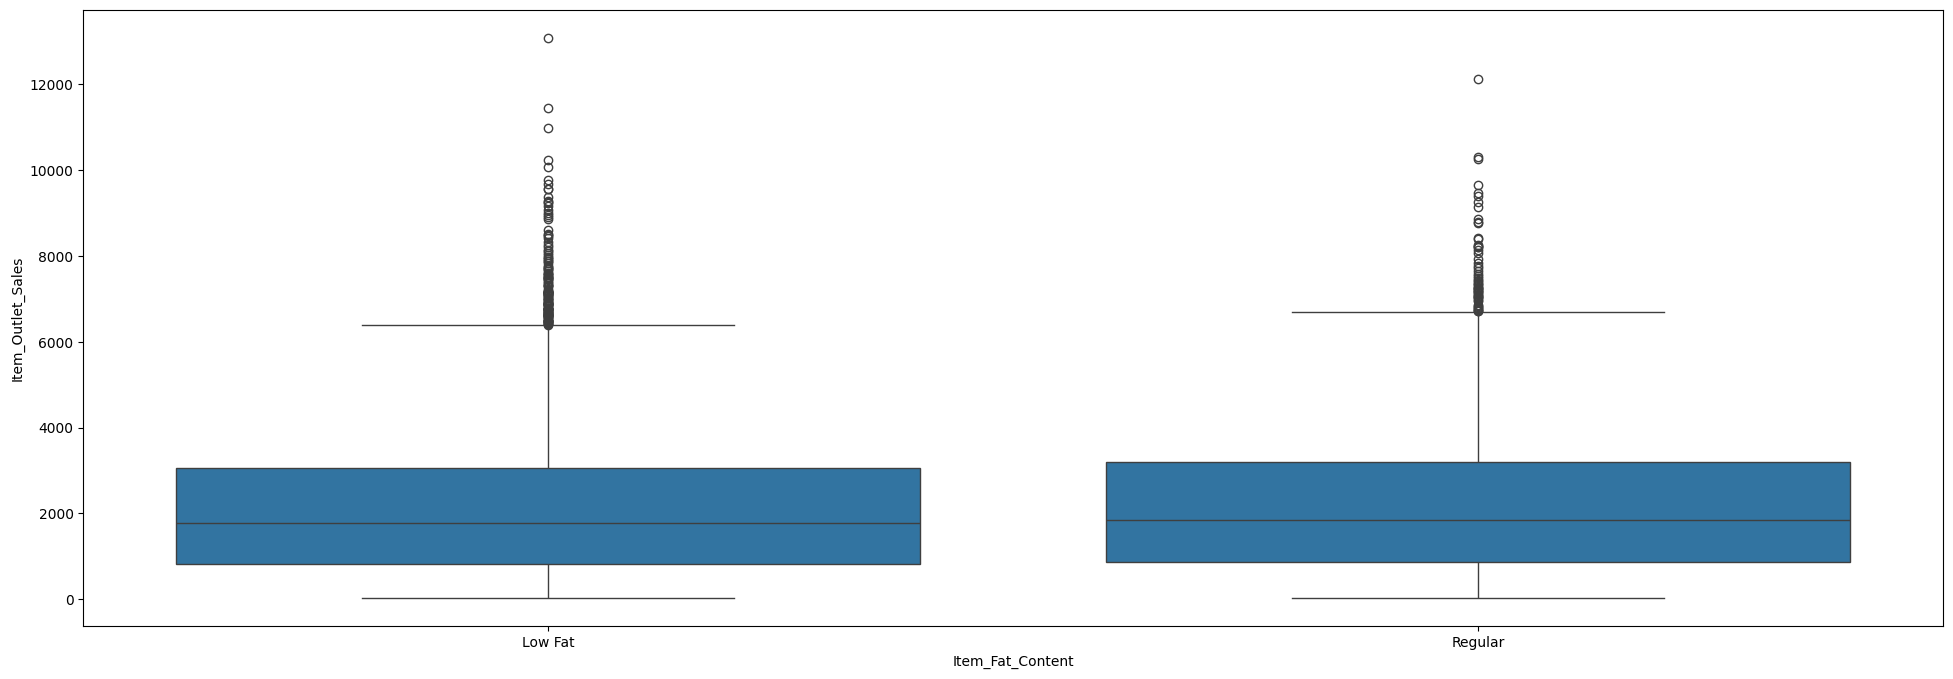

In [426]:
plt.figure(figsize=(24,8));
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train);

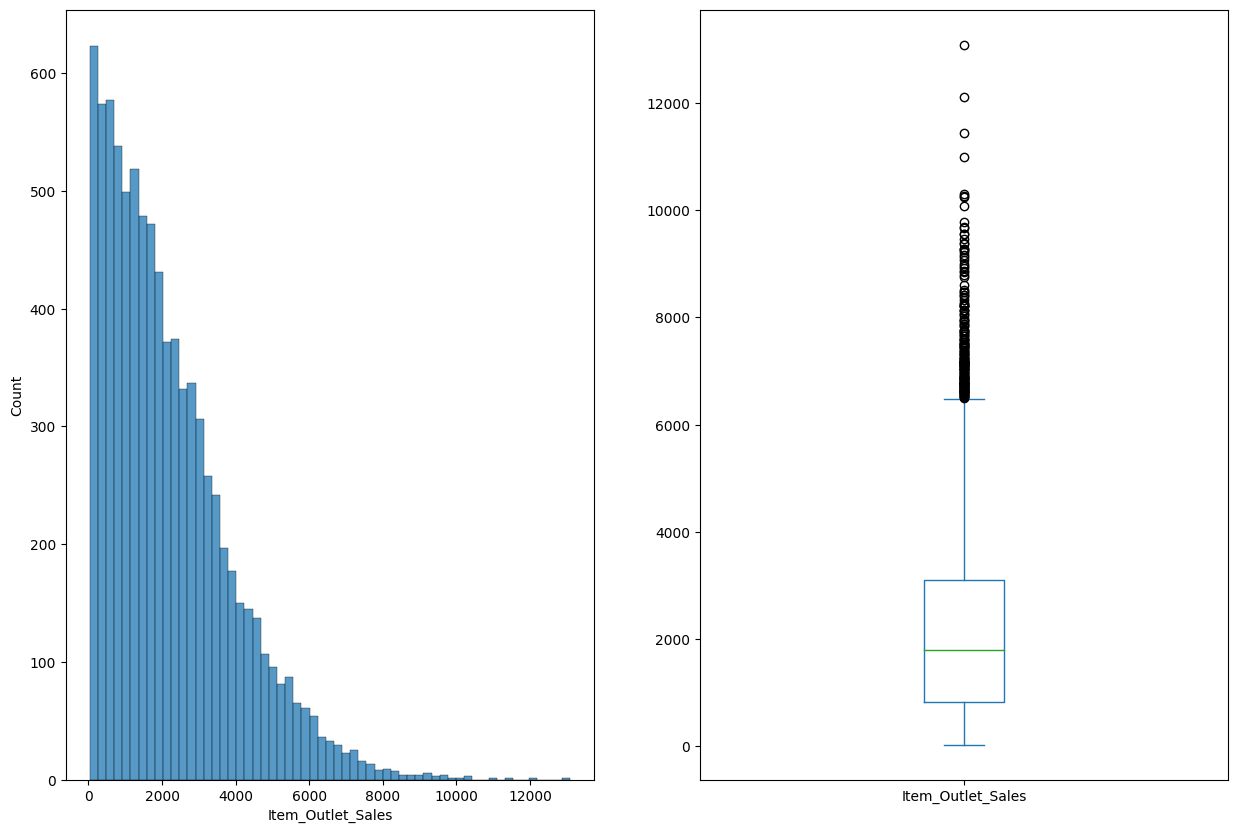

In [427]:
# Target variable distribution
# Visualize Target variable

plt.figure(1);
plt.subplot(121);
sns.histplot(train['Item_Outlet_Sales']);
plt.subplot(122);
train['Item_Outlet_Sales'].plot.box(figsize = (15, 10));
plt.show();

# DATA SKEWNESS OBSERVED

Hence from the above graph we can observe that Item_Outlet_Sales feature is positively skewed


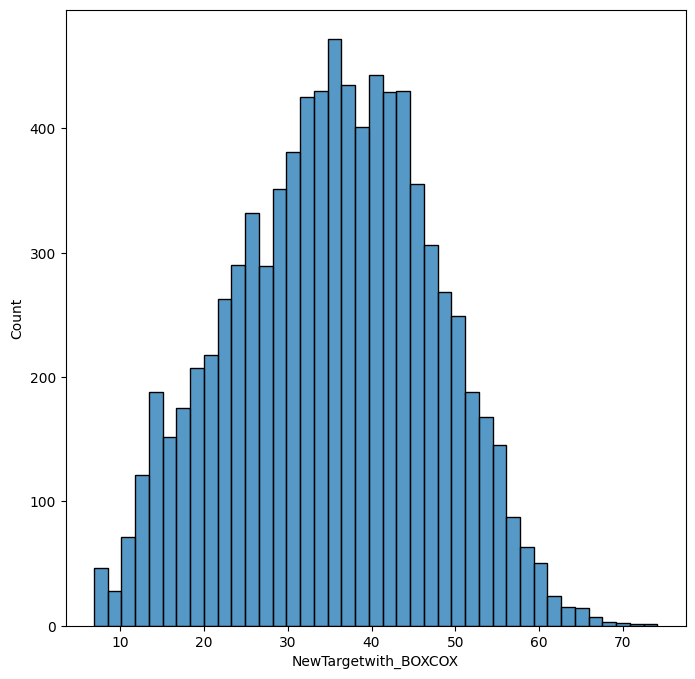

In [428]:
# Applying BOXCOX transformation on Target variable


from scipy.stats import boxcox
train["NewTargetwith_BOXCOX"] = boxcox(train['Item_Outlet_Sales'])[0]
plt.figure(figsize = (8, 8))
sns.histplot(train["NewTargetwith_BOXCOX"]);
plt.show();

In [429]:
# Log transform a single column
train['NewTargetwithLOG'] = np.log(train['Item_Outlet_Sales'])

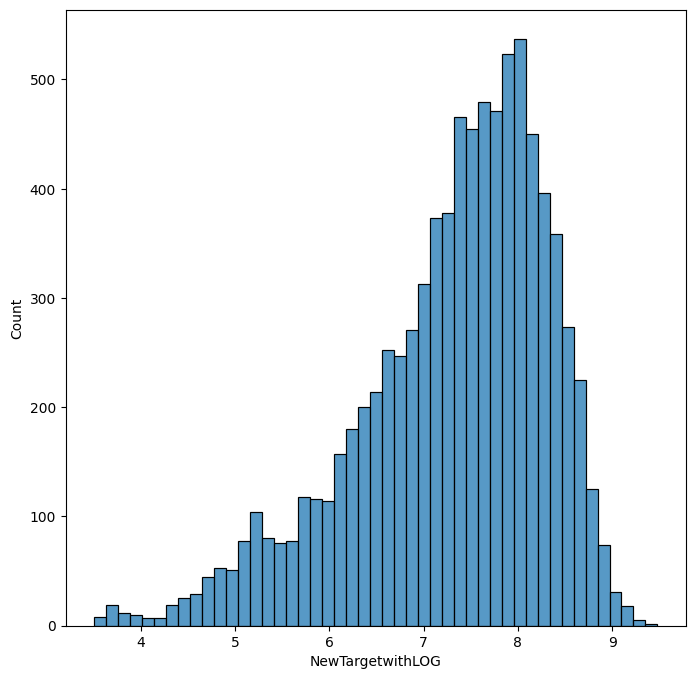

In [430]:
plt.figure(figsize = (8, 8));
sns.histplot(train["NewTargetwithLOG"]);
plt.show();

# Contribution to Sales in-detail overview

In [431]:
# Sales % as per Item_Fat_Content
Item_Fat_Content_TotalSales = train.groupby('Item_Fat_Content').aggregate({'Item_Outlet_Sales': 'mean',
                                                           'Item_Identifier': 'size'
                                                          }).reset_index()

Item_Fat_Content_TotalSales['SalesPercentage'] = Item_Fat_Content_TotalSales['Item_Outlet_Sales'] / Item_Fat_Content_TotalSales['Item_Identifier']



In [432]:
Item_Fat_Content_TotalSales

,Item_Fat_Content,Item_Outlet_Sales,Item_Identifier,SalesPercentage
0,Low Fat,2157.711534,5517,0.391102
1,Regular,2224.561170,3006,0.740040


In [433]:
# Sales % as per Item_Type_TotalSales
Item_Type_TotalSales = train.groupby('Item_Type').aggregate({'Item_Outlet_Sales': 'mean',
                                                           'Item_Identifier': 'size'
                                                          }).reset_index()

Item_Type_TotalSales['SalesPercentage'] = Item_Type_TotalSales['Item_Outlet_Sales'] / Item_Type_TotalSales['Item_Identifier']

In [434]:
Item_Type_TotalSales

,Item_Type,Item_Outlet_Sales,Item_Identifier,SalesPercentage
0,Baking Goods,1952.971207,648,3.013844
1,Breads,2204.132226,251,8.781403
2,Breakfast,2111.808651,110,19.198260
3,Canned,2225.194904,649,3.428652
4,Dairy,2232.542597,682,3.273523
5,Frozen Foods,2132.867744,856,2.491668
6,Fruits and Vegetables,2289.009592,1232,1.857962
7,Hard Drinks,2139.221622,214,9.996363
8,Health and Hygiene,2010.000265,520,3.865385
9,Household,2258.784300,910,2.482181


In [435]:
# Sales % as per # Sales % as per Outlet_Establishment_Year

Outlet_Establishment_Year_TotalSales = train.groupby('Outlet_Establishment_Year').aggregate({'Item_Outlet_Sales': 'mean',
                                                           'Item_Identifier': 'size'
                                                          }).reset_index()

Outlet_Establishment_Year_TotalSales['SalesPercentage'] = Outlet_Establishment_Year_TotalSales['Item_Outlet_Sales'] / Outlet_Establishment_Year_TotalSales['Item_Identifier']

In [436]:
Outlet_Establishment_Year_TotalSales

,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,SalesPercentage
0,1985,2483.677474,1463,1.697661
1,1987,2298.995256,932,2.466733
2,1997,2277.844267,930,2.449295
3,1998,339.351662,555,0.611444
4,1999,2348.354635,930,2.525113
5,2002,2192.384798,929,2.359941
6,2004,2438.841866,930,2.622411
7,2007,2340.675263,926,2.527727
8,2009,1995.498739,928,2.150322


In [437]:
# Sales % as per Outlet_Size
Outlet_Size_TotalSales = train.groupby('Outlet_Size').aggregate({'Item_Outlet_Sales': 'mean',
                                                           'Item_Identifier': 'size'
                                                          }).reset_index()

Outlet_Size_TotalSales['SalesPercentage'] = Outlet_Size_TotalSales['Item_Outlet_Sales'] / Outlet_Size_TotalSales['Item_Identifier']

In [438]:
Outlet_Size_TotalSales

,Outlet_Size,Item_Outlet_Sales,Item_Identifier,SalesPercentage
0,High,1955.474124,3342,0.585121
1,Medium,2681.603542,2793,0.960116
2,Small,1912.149161,2388,0.800732


In [439]:
 # Sales % as per Outlet_Location_Type
Outlet_Location_Type_TotalSales = train.groupby('Outlet_Location_Type').aggregate({'Item_Outlet_Sales': 'mean',
                                                           'Item_Identifier': 'size'
                                                          }).reset_index()

Outlet_Location_Type_TotalSales['SalesPercentage'] = Outlet_Location_Type_TotalSales['Item_Outlet_Sales'] / Outlet_Location_Type_TotalSales['Item_Identifier']

In [440]:
Outlet_Location_Type_TotalSales

,Outlet_Location_Type,Item_Outlet_Sales,Item_Identifier,SalesPercentage
0,Tier 1,1876.909159,2388,0.785975
1,Tier 2,2323.990559,2785,0.834467
2,Tier 3,2279.627651,3350,0.680486


In [441]:

# Sales % as per # Sales % as per Outlet_Type
Outlet_Type_TotalSales = train.groupby('Outlet_Type').aggregate({'Item_Outlet_Sales': 'mean',
                                                           'Item_Identifier': 'size'
                                                          }).reset_index()

Outlet_Type_TotalSales['SalesPercentage'] = Outlet_Type_TotalSales['Item_Outlet_Sales'] / Outlet_Type_TotalSales['Item_Identifier']

In [442]:
Outlet_Type_TotalSales

,Outlet_Type,Item_Outlet_Sales,Item_Identifier,SalesPercentage
0,Grocery Store,339.828500,1083,0.313784
1,Supermarket Type1,2316.181148,5577,0.415310
2,Supermarket Type2,1995.498739,928,2.150322
3,Supermarket Type3,3694.038558,935,3.950843


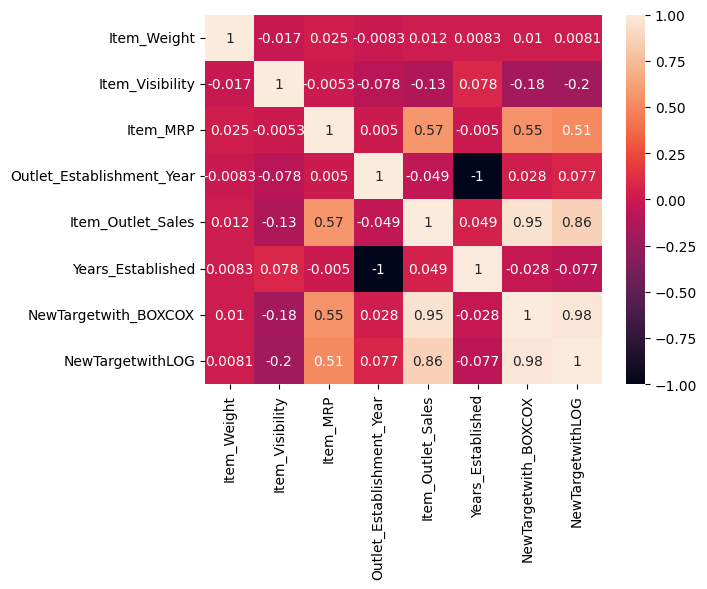

In [443]:
plt.figure()
sns.heatmap(train.corr(numeric_only=True),annot=True);
plt.show();

In [444]:
train['Item_Outlet_Sales'].corr(train['Item_Weight'])
train['Item_Visibility'].corr(train['Item_MRP'])
train['Item_Outlet_Sales'].corr(train['Item_Visibility'])
train['Item_Outlet_Sales'].corr(train['Item_MRP'])
train['Item_Outlet_Sales'].corr(train['Outlet_Establishment_Year'])


0.01155000081770237

-0.005258905861178082

-0.13413765937275884

0.5675744466569195

-0.04913497044082089

In [445]:
train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

# Model Building

In [446]:
X=train.drop(['NewTargetwith_BOXCOX','Item_Outlet_Sales','NewTargetwithLOG'],axis=1,index=None)

y = train['NewTargetwithLOG']

In [447]:
# Preprocessing Task before Model Building
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [448]:
X['Item_Fat_Content']= le.fit_transform(X['Item_Fat_Content'])
X['Item_Type']= le.fit_transform(X['Item_Type'])
X['Outlet_Size']= le.fit_transform(X['Outlet_Size'])
X['Outlet_Location_Type']= le.fit_transform(X['Outlet_Location_Type'])
X['Outlet_Type']= le.fit_transform(X['Outlet_Type'])

In [449]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,25
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,15
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,25
3,19.20,1,0.066132,6,182.0950,1998,0,2,0,26
4,8.93,0,0.066132,9,53.8614,1987,0,2,1,37


In [450]:
  y

,NewTargetwithLOG
0,8.225540
1,6.094524
2,7.648392
3,6.596300
4,6.902446
...,...
8518,7.929625
8519,6.308617
8520,7.084322
8521,7.520558


In [451]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, random_state=101, test_size=0.2)

In [452]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [453]:
X_train_std= sc.fit_transform(X_train)

In [454]:
X_test_std= sc.transform(X_test)

In [455]:
#Model Building
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [456]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [457]:
Y_pred_lr=lr.predict(X_test_std)

In [458]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [459]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5585113531084649
0.5294475065607942
0.6761398306998593


In [460]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [461]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [462]:
Y_pred_rf= rf.predict(X_test_std)

In [463]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.7019714548745914
0.4302423669655015
0.5555276527871748


In [464]:
#Hyper Parameter Tuning

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [465]:
# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, error_score=0, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 100, 1000]}, scoring='r2',
             verbose=2)

Best: 0.702 using {'n_estimators': 1000}
0.678 (0.002) with: {'n_estimators': 10}
0.699 (0.003) with: {'n_estimators': 100}
0.702 (0.002) with: {'n_estimators': 1000}


In [466]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [467]:
grid_search_forest.best_score_

0.7022418866823126

In [468]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)


In [469]:
r2_score(Y_test,Y_pred_rf_grid)


0.7019499301826745

In [470]:
Y_test

,NewTargetwithLOG
8179,6.807738
8355,7.935836
3411,7.574284
7089,6.771780
6954,7.803902
...,...
1317,7.450715
4996,6.818716
531,5.914002
3891,7.213939


# XGBoost Regression


In [471]:
import xgboost as xg

In [472]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators =10, seed = 123)

In [473]:
# Fitting the model
xgb_r.fit(X_train_std,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [474]:
# Predict the model
pred = xgb_r.predict(X_test_std)

In [475]:
print(r2_score(Y_test,pred))
print(mean_absolute_error(Y_test,pred))
print(np.sqrt(mean_squared_error(Y_test,pred)))

0.7226971438677746
0.4121634078497415
0.5358631860332916


#Save the model to disk



In [476]:
import joblib

In [477]:
filename = 'finalized_model.sav'
joblib.dump(xgb_r, filename)

['finalized_model.sav']

In [478]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test_std,Y_test)
print(result)

0.7226971438677746


In [479]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1,25
1,8.300000,Regular,0.038428,Dairy,87.3198,2007,High,Tier 2,Supermarket Type1,17
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,High,Tier 3,Grocery Store,26
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,High,Tier 2,Supermarket Type1,17
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3,39
...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1,27
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2,15
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,High,Tier 2,Supermarket Type1,22
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,High,Tier 2,Supermarket Type1,17


In [480]:
test.isnull().sum()

,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0
Years_Established,0


In [481]:
test['Item_Fat_Content']= le.fit_transform(test['Item_Fat_Content'])
test['Item_Type']= le.fit_transform(test['Item_Type'])
test['Outlet_Size']= le.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type']= le.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type']= le.fit_transform(test['Outlet_Type'])

In [482]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
3684,19.25,0,0.101689,4,54.6956,1987,0,2,1,37
1935,7.63,0,0.061410,14,94.6436,2007,0,1,1,17
5142,19.35,1,0.065891,10,167.0816,2007,0,1,1,17
4978,6.38,0,0.031898,4,177.4344,1997,2,0,1,27
2299,16.70,0,0.022110,4,110.8886,2002,0,1,1,22


In [483]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,20.750000,0,0.007565,13,107.8622,1999,1,0,1,25
1,8.300000,1,0.038428,4,87.3198,2007,0,1,1,17
2,14.600000,0,0.099575,11,241.7538,1998,0,2,0,26
3,7.315000,0,0.015388,13,155.0340,2007,0,1,1,17
4,12.695633,1,0.118599,4,234.2300,1985,1,2,3,39


In [484]:
 Z= loaded_model.predict(test)

In [485]:
Z

array([7.9867845, 7.9867845, 7.67311  , ..., 7.9867845, 7.9867845,
       7.67311  ], dtype=float32)

In [486]:
from numpy import exp

In [487]:
np.exp([Z])

array([[2941.822 , 2941.822 , 2149.7568, ..., 2941.822 , 2941.822 ,
        2149.7568]], dtype=float32)